In [2]:
%reload_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib notebook

In [3]:
from load_and_aggregate_height import *
from geo_scripts.process_height import *
import matplotlib.pyplot as plt

/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/benjamin/.pyenv/versions/3.7.3/envs/georasters/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [4]:
data = gr.from_file(os.path.expanduser("~/Downloads/datasets/chelsea/CHELSA_bio10_12.tif"))

In [5]:
data.geot

(-180.00013888885002, 0.0083333333, 0.0, 83.99986041515001, 0.0, -0.0083333333)

In [5]:
data.xmin


-180.00013888885002

In [6]:
data.ymin

-90.00013888884999

In [7]:
data.x_cell_size

0.0083333333

In [8]:
map_indexes(data, -180, 84)

(-1, 0)

In [9]:
data.map_pixel_location(0,0)

array([10079, 21600])

In [10]:
data.ymax

83.99986041515001

<IPython.core.display.Javascript object>


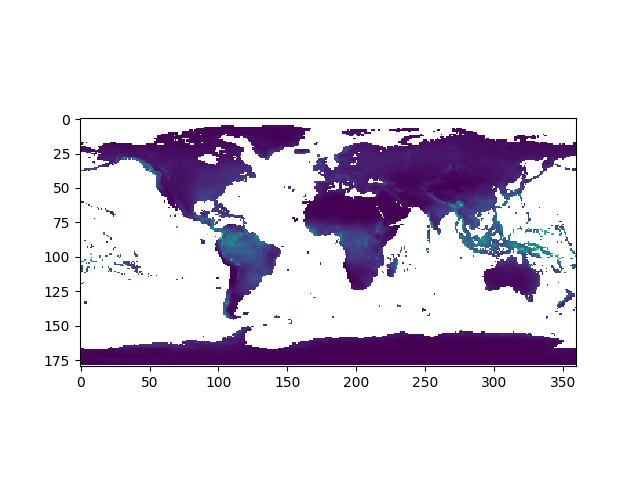

In [16]:
x_ranges = list(gen_ranges(-180, 180, 1))
y_ranges = list(gen_ranges(90, -90, 1))
aggregated = aggregate_grid(data, x_ranges, y_ranges)
plt.imshow(aggregated)

<IPython.core.display.Javascript object>


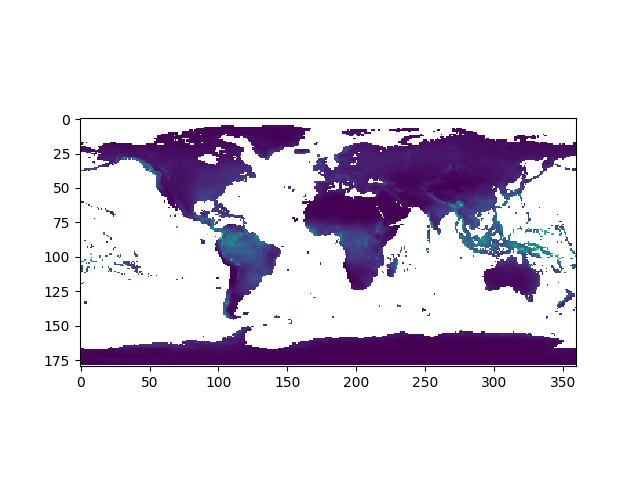

In [17]:
slices = get_slices(data, x_ranges, y_ranges)
sl_ag = aggregate_slices(slices)
plt.imshow(sl_ag)

<IPython.core.display.Javascript object>


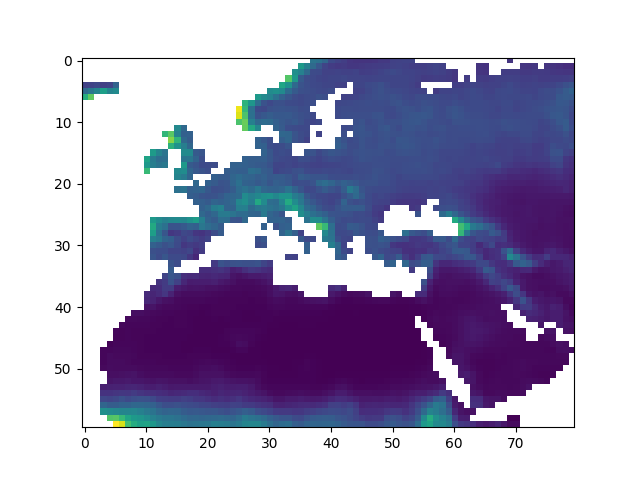

In [18]:
def filter_masked(data):
    if np.mean(data.mask) > 0.65:
        return np.ma.masked
    else:
        return np.ma.mean(data)

sl_ag = aggregate_slices(slices, filter_masked)
plt.imshow(sl_ag[20:80,160:240])

In [19]:
data.geot

(-180.00013888885002, 0.0083333333, 0.0, 83.99986041515001, 0.0, -0.0083333333)

<IPython.core.display.Javascript object>


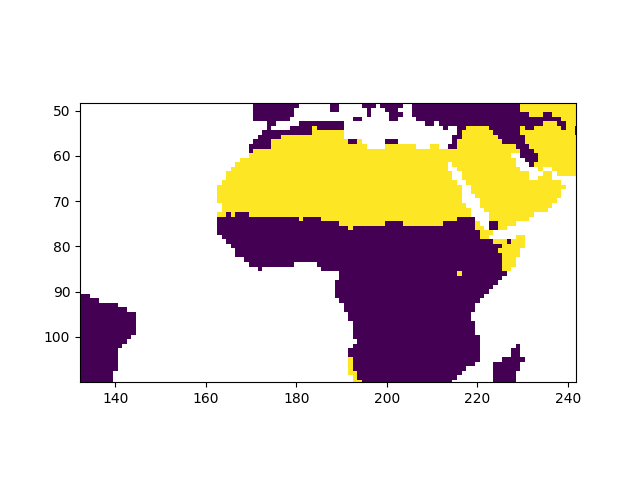

In [21]:
desert = sl_ag < 250
plt.imshow(desert)